# hw2 decision tree
這一個檔案將自己隨機產生的女孩資料作為訓練資料讀取進來，經過適當的整理之後餵給decision tree訓練，最後再和資料的答案比較，確認預測的準確率。

### import packages

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH'] + (';C:\\Users\\Mimori\\Anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz\\')

#### data preprocessing
因為是自己產生的資料，所以還算是乾淨，比較不會有缺漏之類的狀況發生。只要把需要和不需要的資料區分開來，再把資料型態改好就行。

### 把score拿掉，只留喜歡或不喜歡的1或0

In [2]:
df = pd.read_csv('./data/DT_data.csv')
df = df.drop('score', 1)
df.head()

,height,weight,age,cup,income,suki
0,154,46,36,f,66000,1
1,162,32,12,d,59000,1
2,140,53,17,f,70000,1
3,169,54,36,e,70000,1
4,143,56,17,e,22000,0


### 把資料型態是字元的cup改為用數字表示

In [3]:
# deal with the char data in cup!
cup_map = {'a' : 0, 'b' :1, 'c' :2, 'd' :3, 'e' :4, 'f' :5}
df['cup'] = df['cup'].map(cup_map)
df.head()

,height,weight,age,cup,income,suki
0,154,46,36,5,66000,1
1,162,32,12,3,59000,1
2,140,53,17,5,70000,1
3,169,54,36,4,70000,1
4,143,56,17,4,22000,0


### 把資料分成訓練資料和測試資料

In [4]:
df_train = df[:1400]
df_train.head()

,height,weight,age,cup,income,suki
0,154,46,36,5,66000,1
1,162,32,12,3,59000,1
2,140,53,17,5,70000,1
3,169,54,36,4,70000,1
4,143,56,17,4,22000,0


In [5]:
df_test = df[1400:]
df_test.head()

,height,weight,age,cup,income,suki
1400,145,66,29,4,66000,1
1401,164,64,37,0,78000,0
1402,163,59,21,5,76000,1
1403,140,50,26,5,54000,1
1404,155,54,18,1,58000,1


### 分別從訓練資料和測試資料取出suki欄位的資料作為答案的y

In [6]:
y = df_train['suki'].values
df_train = df_train.drop('suki', 1)

In [7]:
y_test = df_test['suki'].values
X_test = df_test.drop('suki', 1)

### 建立decision tree，測試不同depth的結果
把訓練資料丟給decision tree訓練，產生喜歡和不喜歡兩種結果。suki是喜歡，kirai是不喜歡。

#### depth = 5的decision tree
一開始先把depth設定為5，把每一個特徵都拿來判斷結果，並且找出五個特徵分別的重要程度。可以看到這裡找出來最重要的兩個特徵分別是年齡和月收入，都是我們一開始權重就給到3的特徵，符合我們的設定。

把測試資料丟進訓練好的decision tree，得到預測結果y_predict，並計算準確度。一開始五個特徵都用，準確率可以到0.903。

另外因為有點太多層，字太小了，所以到後面剩三層左右的時候再看圖

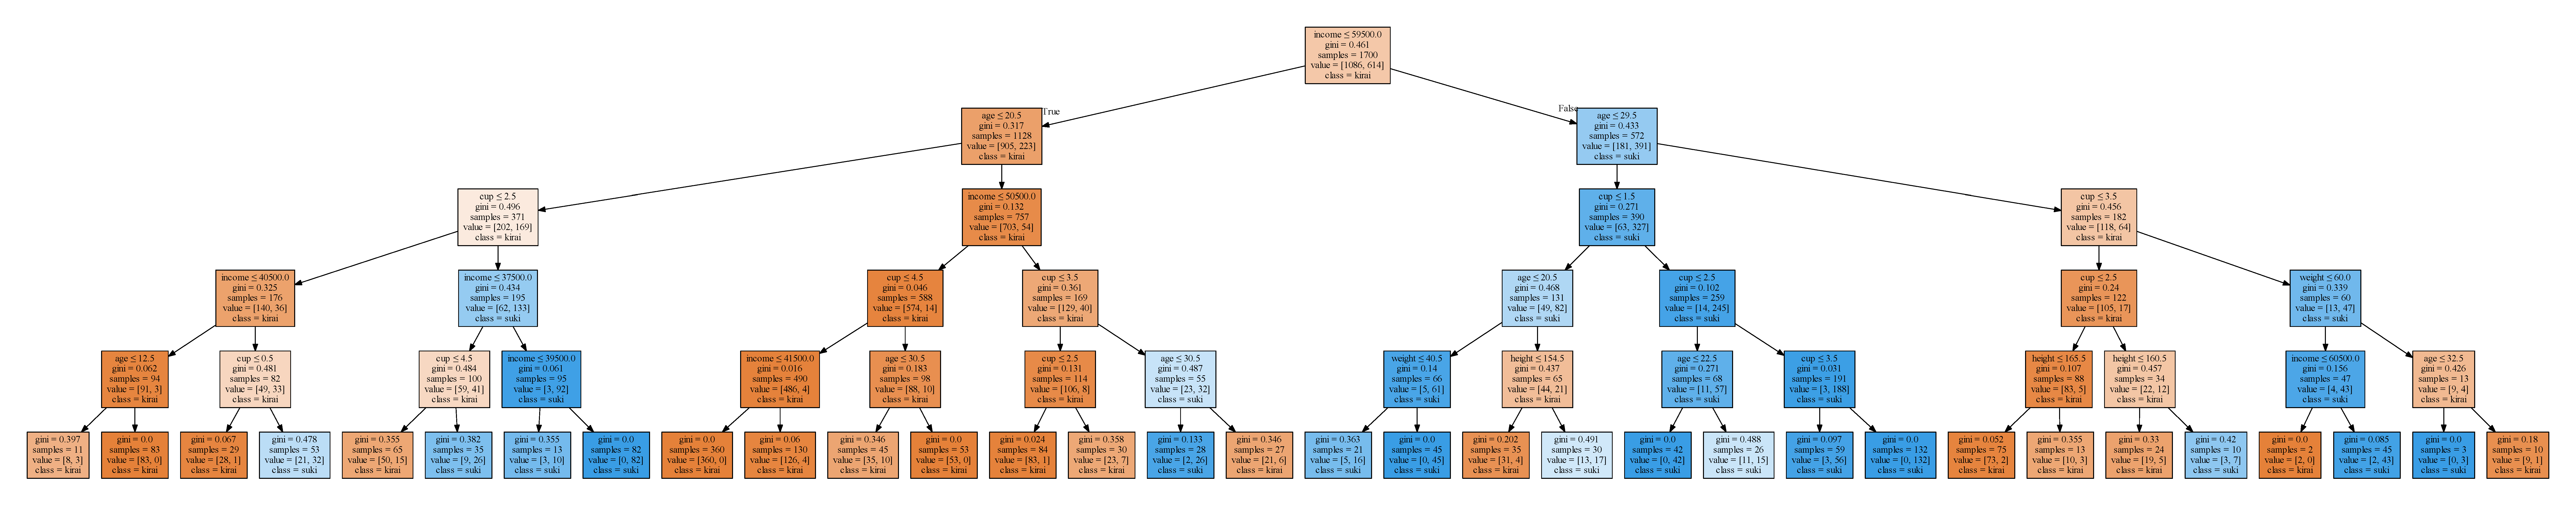

In [8]:
depth = 5

dtree=DecisionTreeClassifier(max_depth = depth)
dtree.fit(df_train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['kirai','suki'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("./tree_file/tree_depth_" + str(depth) + ".pdf")
dtree.feature_importances_

array([0.00852284, 0.01190148, 0.29823754, 0.25083405, 0.43050409])

In [9]:
y_predict = dtree.predict(X_test)
accuracy_score(y_test, y_predict)

0.9033333333333333

#### depth = 4的decision tree
可以看到其中一個比較不重要的特徵身高已經被拿掉了，準確率也沒有下降得非常多，從0.903掉到0.888而已

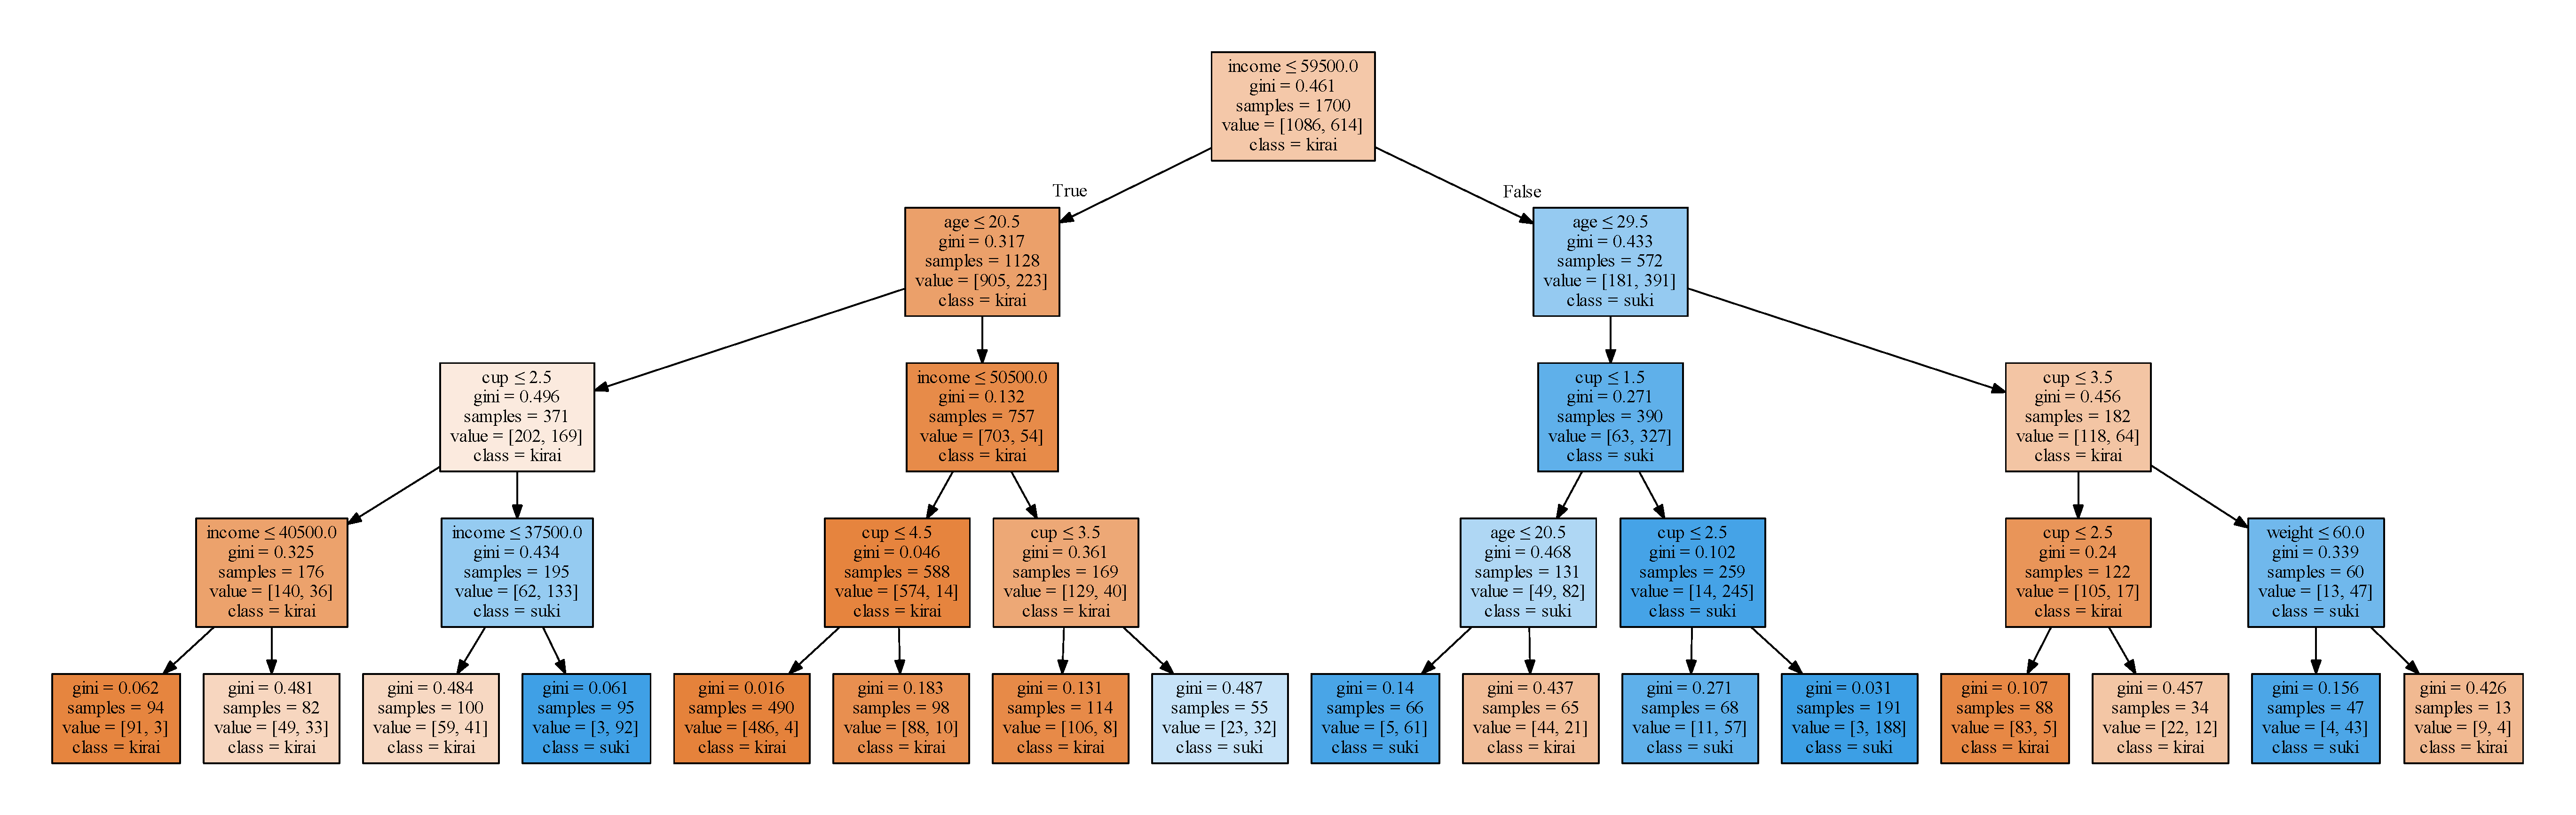

In [10]:
depth = 4

dtree=DecisionTreeClassifier(max_depth = depth)
dtree.fit(df_train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['kirai','suki'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("./tree_file/tree_depth_" + str(depth) + ".pdf")
dtree.feature_importances_

array([0.        , 0.01368835, 0.28459163, 0.21910063, 0.48261938])

In [11]:
y_predict = dtree.predict(X_test)
accuracy_score(y_test, y_predict)

0.8883333333333333

#### depth = 3的decision tree
這次被拿掉的是另外一個不重要的特徵體重，但拿掉了兩項特徵之後，準確率就開始稍微明顯的下降，從0.888降到0.848。
因為字變的比剛才大了，所以可以看到這個decision tree 一開始就直接先看收入，判斷收入是否小於等於58500之後，才進入下個問題。
第二層主要是問年齡，這是第二個重要的特徵。
第三層的cup是第三個重要的特徵，但在這一層也出現了收入的問題，可能代表收入這一個特徵真的有它的重要性。

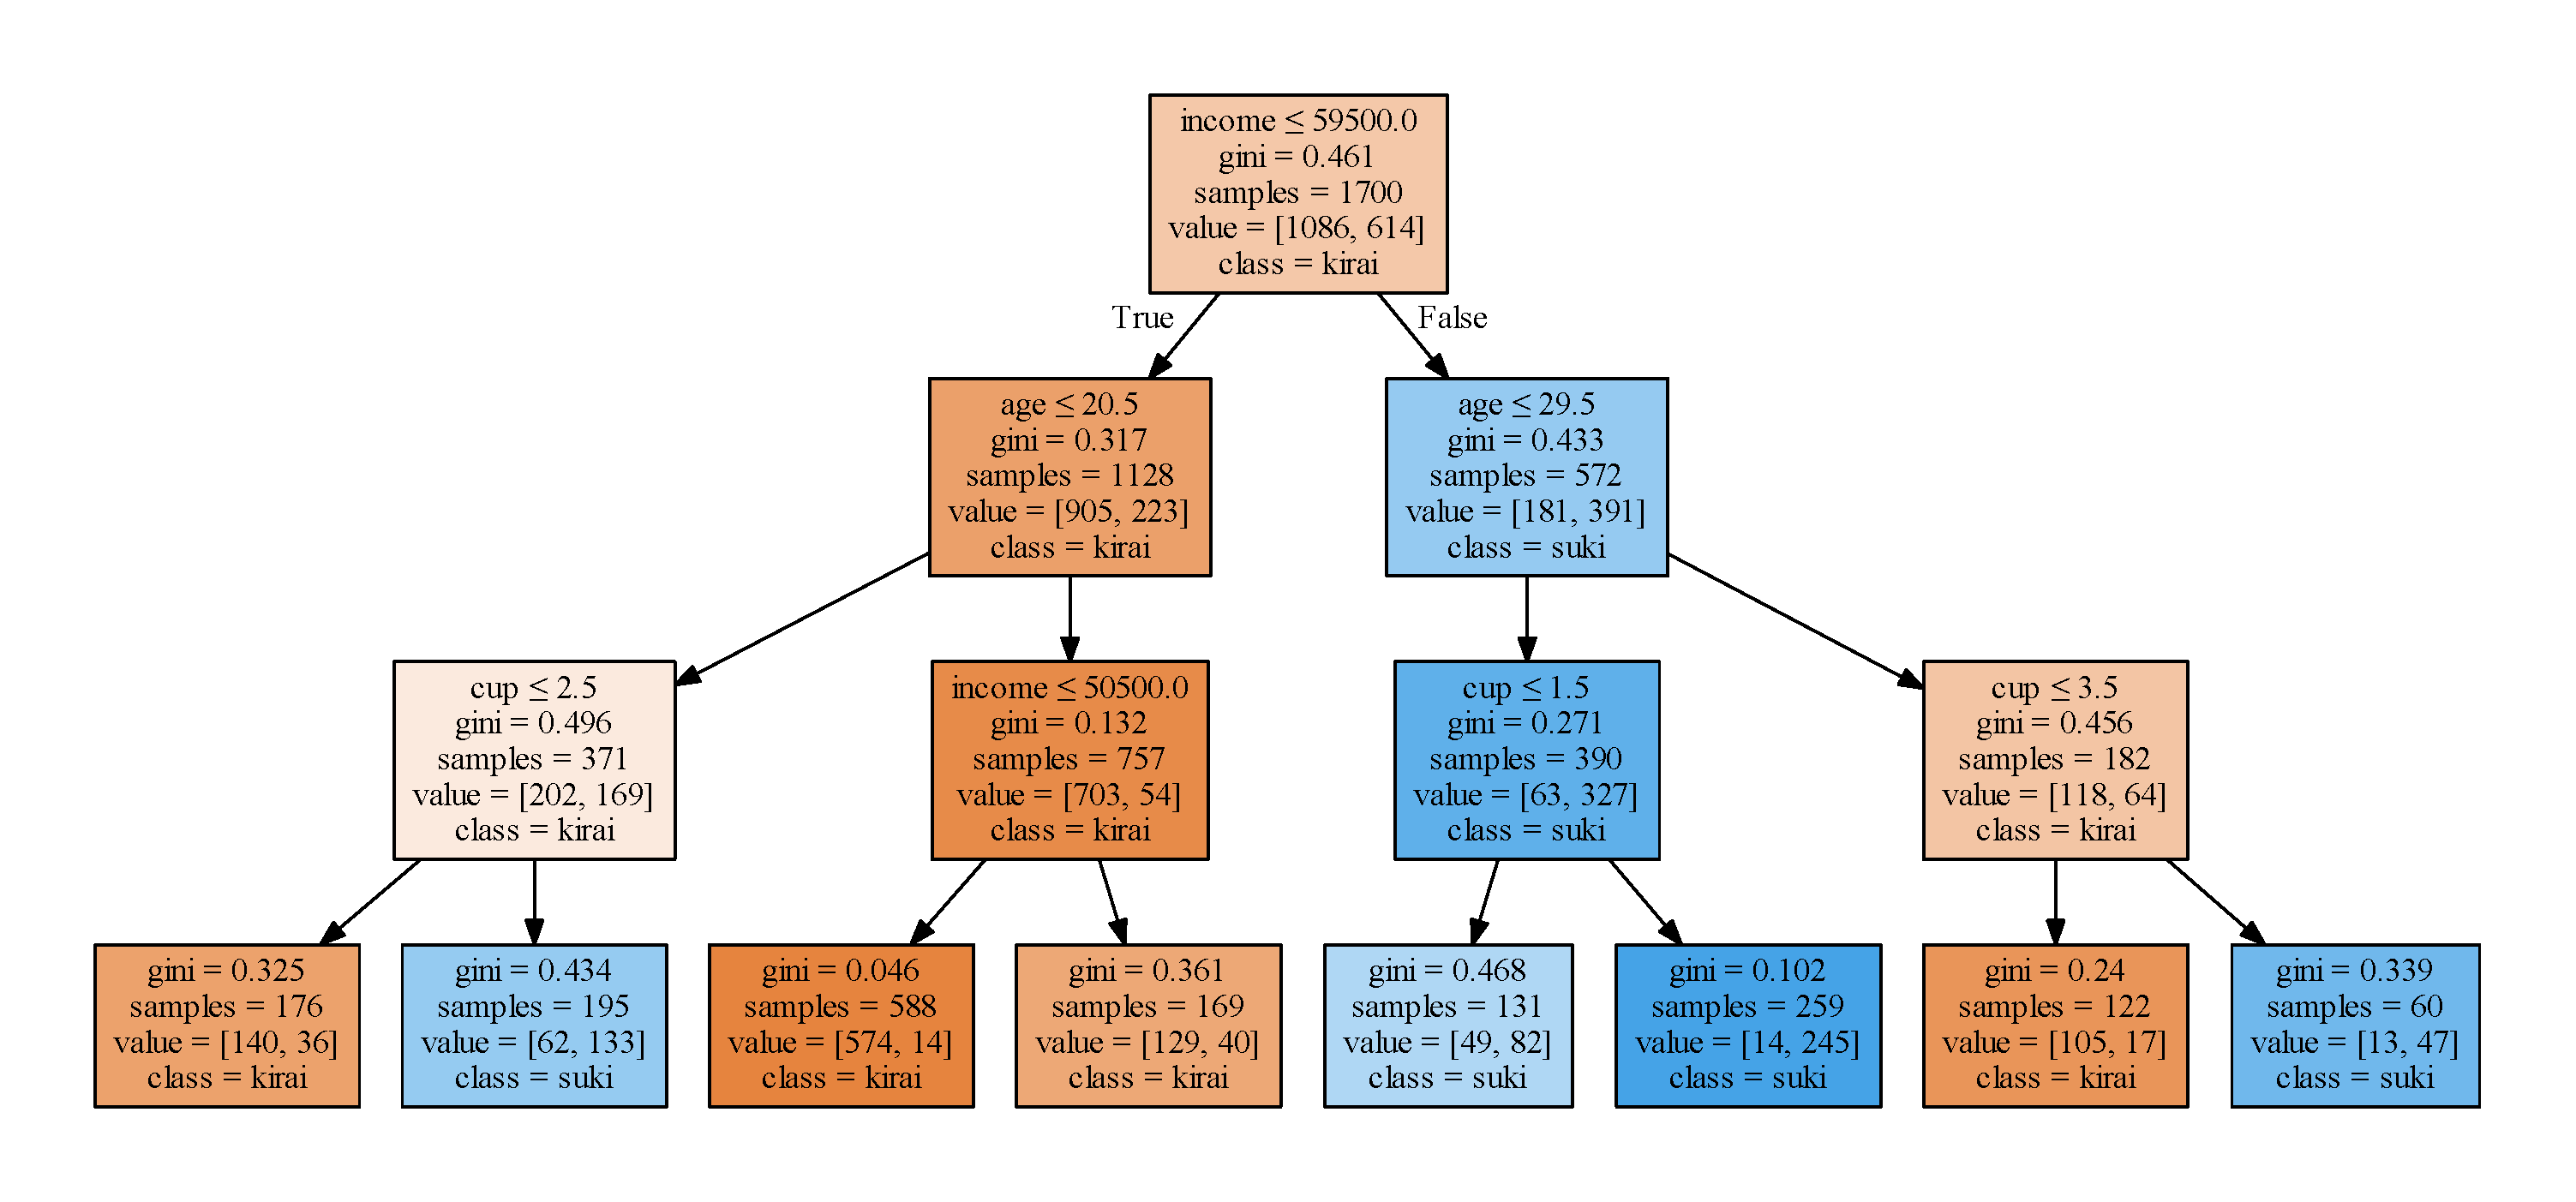

In [12]:
depth = 3

dtree=DecisionTreeClassifier(max_depth = depth)
dtree.fit(df_train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['kirai','suki'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("./tree_file/tree_depth_" + str(depth) + ".pdf")
dtree.feature_importances_

array([0.        , 0.        , 0.30311277, 0.22052733, 0.4763599 ])

In [13]:
y_predict = dtree.predict(X_test)
accuracy_score(y_test, y_predict)

0.8483333333333334

#### depth = 2的decision tree
再拿掉一個特徵cup，準確率也從0.848再降到0.788

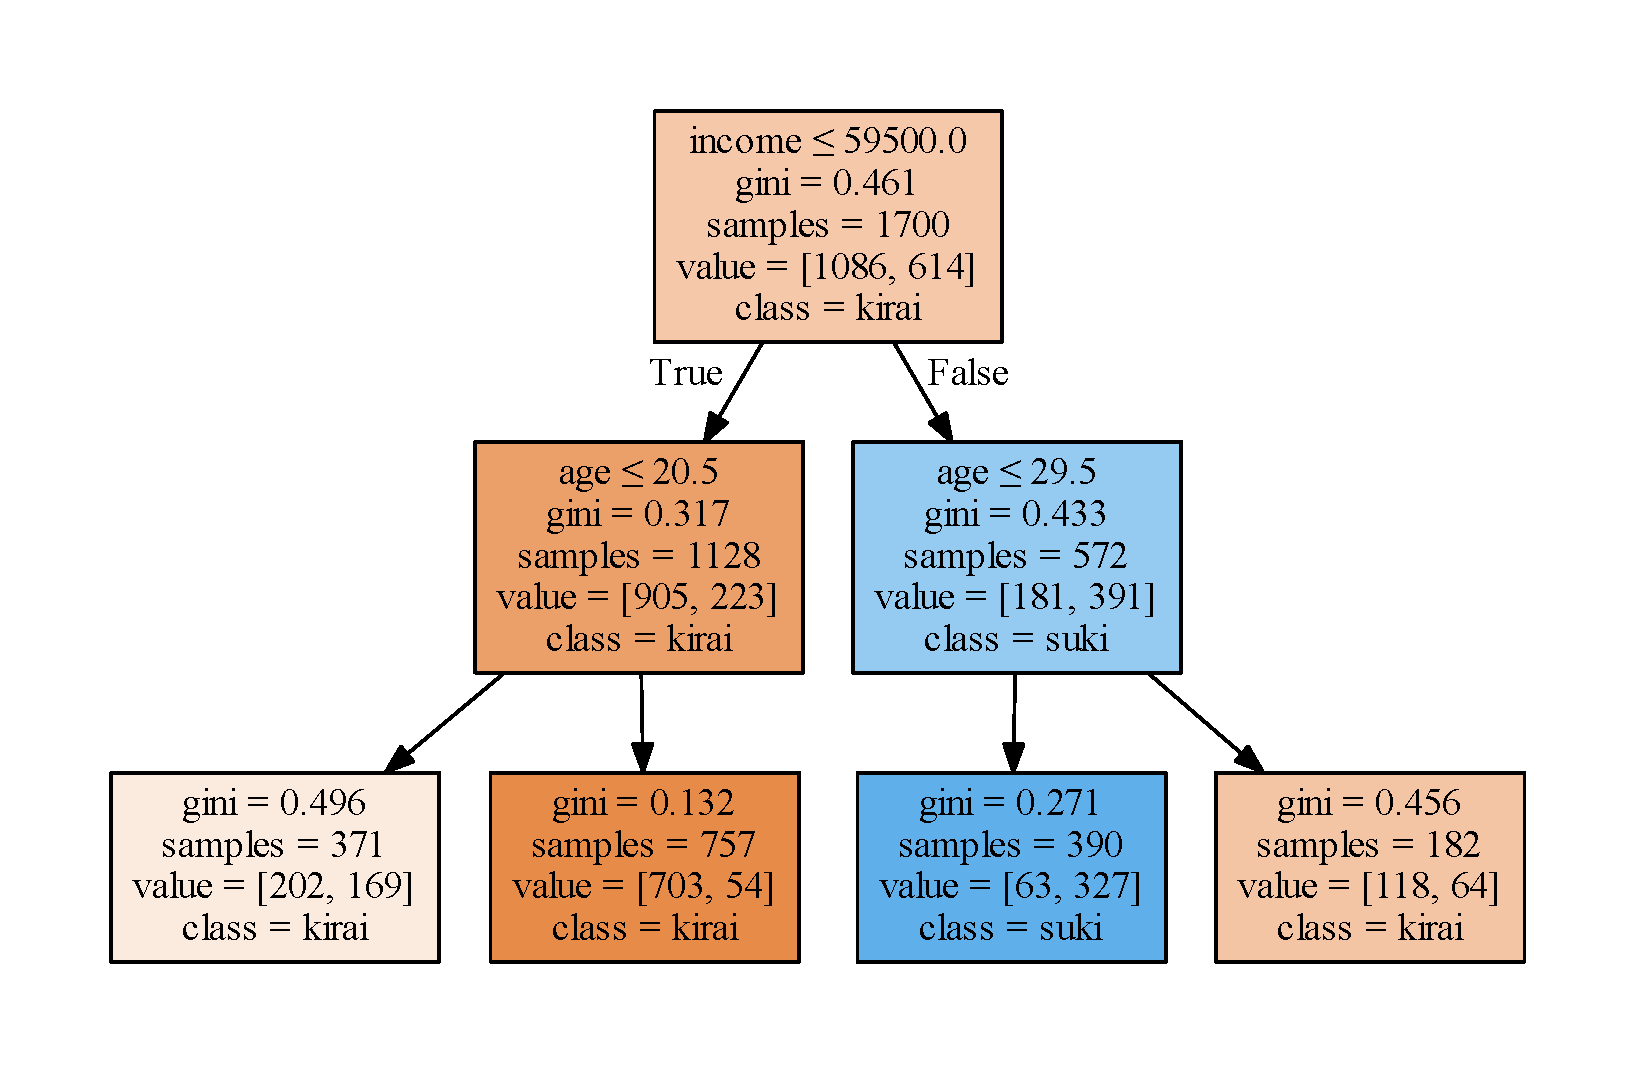

In [14]:
depth = 2

dtree=DecisionTreeClassifier(max_depth = depth)
dtree.fit(df_train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['kirai','suki'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("./tree_file/tree_depth_" + str(depth) + ".pdf")
dtree.feature_importances_

array([0.        , 0.        , 0.40356557, 0.        , 0.59643443])

In [15]:
y_predict = dtree.predict(X_test)
accuracy_score(y_test, y_predict)

0.7883333333333333

#### depth = 1的decision tree
剩下最後的一個特徵income，但是預測準確率卻還是有0.73，比想像的還要高很多。可能是資料設計的有問題，導致有權重相同的特徵造成的影響程度不相同。
結論只要月收入58500以上，就是我的菜!

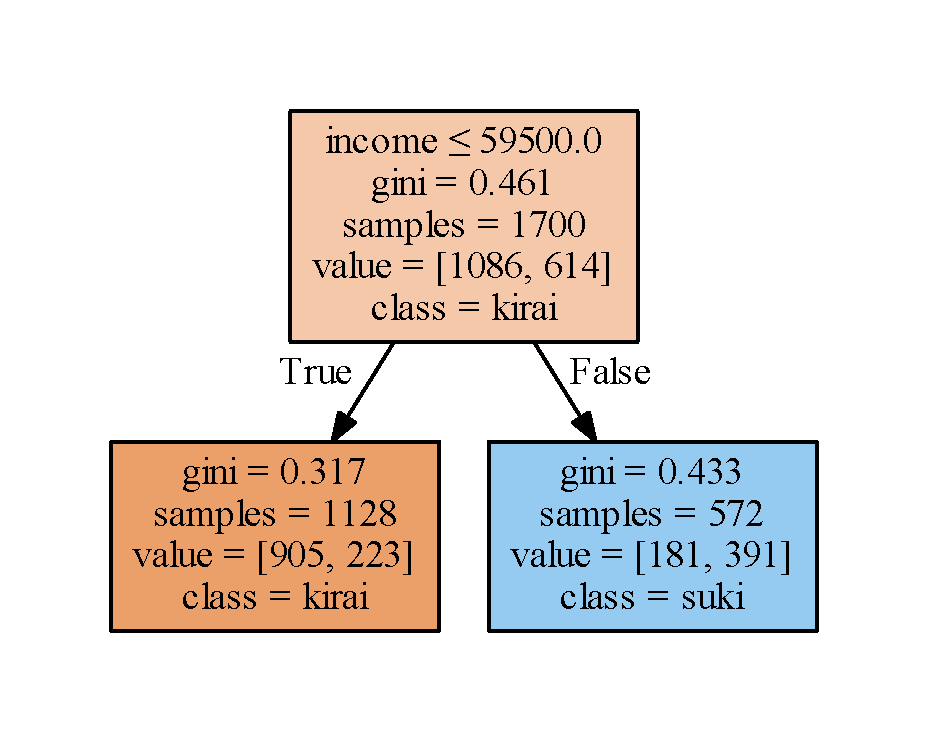

In [16]:
depth = 1

dtree=DecisionTreeClassifier(max_depth = depth)
dtree.fit(df_train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['kirai','suki'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("./tree_file/tree_depth_" + str(depth) + ".pdf")
dtree.feature_importances_

array([0., 0., 0., 0., 1.])

In [17]:
y_predict = dtree.predict(X_test)
accuracy_score(y_test, y_predict)

0.73

## try random forest
讓很多decision tree來投票選出這個女生我喜不喜歡。這裡測試看看decision tree數量不同(n_estimators參數的調整)，結果會有什麼變化

In [18]:
from sklearn.ensemble import RandomForestClassifier

#### n_estimators = 2(兩棵樹)
準確率0.888，跟一棵樹的時候差不多

In [19]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=2,random_state=3,n_jobs=2)
forest.fit(df_train,y)
forest.feature_importances_

array([0.07943522, 0.11260101, 0.28080013, 0.15045744, 0.37670621])

In [20]:
y_predict = forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.8883333333333333

#### n_estimators = 10(十棵樹)
數量增加到十棵樹，準確率有明顯的提升，來到了0.931

In [21]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=10,random_state=3,n_jobs=2)
forest.fit(df_train,y)
forest.feature_importances_

array([0.09061458, 0.10819967, 0.27689324, 0.14802926, 0.37626326])

In [22]:
y_predict = forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.9316666666666666

#### n_estimators = 100(一百棵樹)
一次把樹的數量增加到100，但結果準確率還是在0.94左右，看來已經是極限了，再增加也沒有用。

In [23]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=100,random_state=3,n_jobs=2)
forest.fit(df_train,y)
forest.feature_importances_

array([0.08537189, 0.09732473, 0.27599294, 0.17149631, 0.36981413])

In [24]:
y_predict = forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.9383333333333334